In [1]:
### Setup environment
import os
import glob
import subprocess
import sys
import time
from scipy.io import netcdf as nc

import matplotlib.pyplot as plt
from os.path import expanduser

### Define output path
home = expanduser("~")
output_dir = os.path.join(home,'scratch')  # main output directory.
os.makedirs(os.path.dirname(output_dir), exist_ok=True)
print(output_dir)

/Users/shawnserbin/scratch


In [2]:
### Grab latest CTSM docker container from Docker hub
source = "serbinsh/ctsm_containers"
docker_container_tag = "ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0"
container_name = ''.join([source,":",docker_container_tag])
print(container_name)
docker_pull_command = ''.join(["docker pull ",source,":",docker_container_tag])
os.system(docker_pull_command)

# you should see docker pull progress in the Jupyter shell

serbinsh/ctsm_containers:ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0


256

In [3]:
### Define run parameters for CTSM
start_year = '1900-01-01'  # you need to place this in the single quotations
num_years = 120
met_start = 2008
met_end = 2016
run_type = "startup"
hostname = "modex"
user = "clmuser"

# Define input/output paths (host:container)
cesm_input_data_paths = "/Users/shawnserbin/Data/cesm_input_data:/data"
output_path = ''.join([output_dir,":/ctsm_output"])
print(output_path)

# Define script to run
host_script_dir = "/Users/shawnserbin/Data/GitHub/ctsm_containers/ctsm_run_scripts:/ctsm_run_scripts"
ctsm_case_build_script = "/ctsm_run_scripts/create_case_ctsmfates_1pt_example_PA-SLZ.sh"


/Users/shawnserbin/scratch:/ctsm_output


In [ ]:
### Define case build command
run_command = ''.join(["docker run --hostname=",hostname," --user ",user," -v ", host_script_dir," -v ",cesm_input_data_paths, " -v ", output_path, " ", container_name, " ", ctsm_case_build_script, " ", "-sy=","'",start_year.__str__(),"'", " ", "-ny=",num_years.__str__()," ","-rt=",run_type," ","-mets=",met_start.__str__()," ","-mete=",met_end.__str__()])
print(run_command)

docker run --hostname=modex --user clmuser -v /Users/shawnserbin/Data/GitHub/ctsm_containers/ctsm_run_scripts:/ctsm_run_scripts -v /Users/shawnserbin/Data/cesm_input_data:/data -v /Users/shawnserbin/scratch:/ctsm_output serbinsh/ctsm_containers:ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0 /ctsm_run_scripts/create_case_ctsmfates_1pt_example_PA-SLZ.sh -sy='1900-01-01' -ny=120 -rt=startup -mets=2008 -mete=2016


In [5]:
### Build the case
start = time.time()
# run the docker container
os.system(run_command)
# get runtime
end = time.time()
#Print runtime
print(end - start)

140.54826188087463


In [ ]:
### Setup case run command
case_directory = "CLM5FATES_1554173511_1x1PASLZ" # need to grab this from the shell
run_command = ''.join(["docker run --hostname=",hostname," --user ",user," -v ", cesm_input_data_paths, " -v ", output_path, " ",container_name, " ","/bin/sh -c 'cd /ctsm_output/",case_directory," && ./case.submit'"])
print(run_command)


docker run --hostname=modex --user clmuser -v /Users/shawnserbin/Data/cesm_input_data:/data -v /Users/shawnserbin/scratch:/ctsm_output serbinsh/ctsm_containers:ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0 /bin/sh -c 'cd /ctsm_output/CLM5FATES_1554173511_1x1PASLZ && ./case.submit'


In [ ]:
### Run the case
start = time.time()
# run the docker container
os.system(run_command)
# get runtime
end = time.time()
#Print runtime
print(end - start)

In [ ]:
### explore output

# first concatenate netCDF files
ncfiles = ''.join([case_directory,".clm2.h0.*"])
print(ncfiles)

concat_command = ''.join(["cd ",output_dir,"/",case_directory,"/run"," && ncrcat ",ncfiles," all_years.nc"])
print(concat_command)
os.system(concat_command)

In [18]:
### view output header
ncdump = ''.join(["cd ",output_dir,"/",case_directory,"/run"," && ncdump -h all_years.nc"])
print(ncdump)
os.system(ncdump)

cd /Users/shawnserbin/scratch/CLM5FATES_1554155156_1x1PASLZ/run && ncdump -h all_years.nc


0

In [19]:
### get output
filename_in = ''.join([output_dir,"/",case_directory,"/run/all_years.nc"])
print(filename_in)
fin = nc.netcdf_file(filename_in)


/Users/shawnserbin/scratch/CLM5FATES_1554155156_1x1PASLZ/run/all_years.nc


In [20]:
### read the coordinate data for the various dimensions
time = fin.variables['time'][:]  ### time dimension, put in unit of years
print(time)

[0.0000000e+00 4.1666668e-02 8.3333336e-02 ... 3.6491666e+02 3.6495834e+02
 3.6500000e+02]


In [21]:
# get variables
gpp = fin.variables['GPP'][:]
print(gpp)
lai = fin.variables['TLAI'][:]
print(lai)

[[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 ...
 [1.0672104e-05]
 [4.7461049e-06]
 [4.1661849e-08]]
[[0.08078604]
 [0.08038609]
 [0.07998615]
 ...
 [0.13924414]
 [0.13924414]
 [0.13924414]]


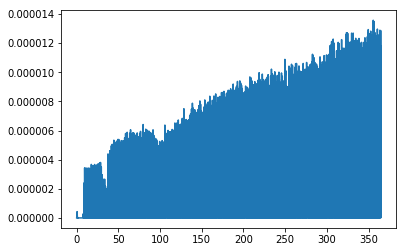

In [22]:
### Plot output

# GPP
plt.plot(time,gpp, label='GPP')

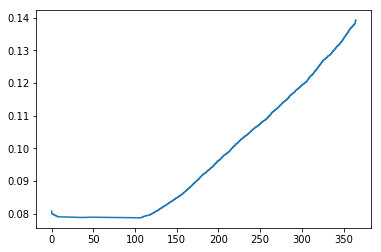

In [23]:
# TLAI
plt.plot(time,lai, label='TLAI')